In [80]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import scipy
from IPython.display import display, Latex

In [81]:
k1, k2, k3 = 1, 4, 1
p1, p2, p3 = 2, 1.2, 1
q1, q2, q3 = 1, 2, 1.5
m1, m2, m3 = 2, 3, 3

alpha1, alpha2 = 1.5, 1.1
a, b = 0, 1
n = 201 #41  81, 201

In [82]:
x = sp.symbols('x')
f = sp.symbols('f', cls=sp.Function)(x)
u = m1 * sp.cos(m2 * x) + m3
k = k1 * sp.cos(k2 * x) + k3
q = q1 * sp.sin(q2 * x) + q3

In [83]:
eq0 = -sp.diff(k*sp.diff(f, x), x) + q * f
eq1 = (-k * sp.diff(u, x) + alpha1 * u)
eq2 = (k * sp.diff(u, x) + alpha2 * u)

In [84]:
f1 = eq0.subs({f:u}).simplify()
f1

(sin(2*x) + 1.5)*(2*cos(3*x) + 3) + 18*(cos(4*x) + 1)*cos(3*x) - 24*sin(3*x)*sin(4*x)

In [85]:
C1 = eq1.subs({f:u}).simplify()
C1

6*(cos(4*x) + 1)*sin(3*x) + 3.0*cos(3*x) + 4.5

In [86]:
C2 = eq2.subs({f:u}).simplify()
C2

-6*(cos(4*x) + 1)*sin(3*x) + 2.2*cos(3*x) + 3.3

In [87]:
mu1 = sp.simplify(eq1.subs({u:u}).subs({x:a}))
mu1

7.50000000000000

In [88]:
mu2 = sp.simplify(eq2.subs({u:u}).subs({x:b})).evalf()
mu2

0.828749617387139

In [89]:
h = (b - a) * 1.0 / n
X = np.linspace(start=a, stop=b + h, num=n + 2)

In [90]:
A = np.array([h / sp.integrate( 1 / k, (x, X[i], X[i+1])).evalf() for i in range(n + 1)])

In [91]:
D = np.array(
    [2 / h * sp.integrate(q, (x, a, a + h / 2)).evalf()] + 
    [1 / h * sp.integrate(q, (x, X[i + 1] - h / 2, X[i+1] + h / 2)).evalf() for i in range(n + 1)] 
    + [2 / h * sp.integrate(q, (x, b - h / 2, b)).evalf()])

In [92]:
Phi = np.array(
    [2 / h * sp.integrate(f1, (x, a, a + h / 2)).evalf()] +
    [1 / h * sp.integrate(f1, (x, X[i + 1] - h / 2, X[i+1] + h / 2)).evalf() for i in range(n + 1)] + 
    [2 / h * sp.integrate(f1, (x, b - h / 2, b)).evalf()])

In [93]:
AA = np.zeros((n + 1, n + 1))
BB = np.zeros(n + 1)

In [94]:
alpha1_ = alpha1 + h / 2 * D[0]
mu1_ = mu1 + h / 2 * Phi[0]
AA[0][0] = A[0] / h + alpha1_
AA[0][1] = -A[0] / h
BB[0] = mu1_

In [95]:
for i in range(1, n):
    AA[i][i - 1] = -A[i] / h ** 2
    AA[i][i] = (A[i+1] + A[i]) / h ** 2 + D[i]
    AA[i][i + 1] = -A[i + 1] / h ** 2
    BB[i] = Phi[i]

In [96]:
alpha2_ = alpha2 + h / 2 * D[-1]
mu2_ = mu2 + h / 2 * Phi[-1]

AA[n][n - 1] = -A[-1] / h + alpha2_
AA[n][n] = A[-1] / h
BB[n] = mu2_

In [97]:
Yi = scipy.linalg.solve(np.array(AA), np.array(BB))

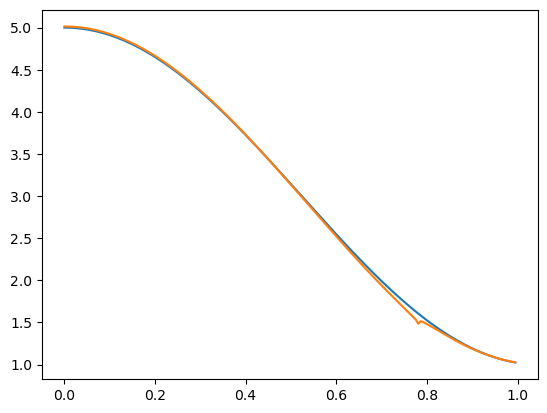

In [98]:
plt.plot(X[:n], [u.subs({x:xi}) for xi in X[:n]], label='u(x)')
plt.plot(X[:n], Yi[:n], label='ui(x)')